# Изучение закономерностей, определяющих успешность игр

# Описание проекта:

Для исследования нам доступны из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы за период с 1980 года по 2016 год. Данные загружены в файл формата csv

# Цель: 

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры  

# Описание данных

• `Name` — название игры

• `Platform` — платформа

• `Year_of_Release` — год выпуска

• `Genre` — жанр игры

• `NA_sales` — продажи в Северной Америке (миллионы проданных копий)

• `EU_sales` — продажи в Европе (миллионы проданных копий)

• `JP_sales` — продажи в Японии (миллионы проданных копий)

• `Other_sales` — продажи в других странах (миллионы проданных копий)

• `Critic_Score` — оценка критиков (максимум 100)

• `User_Score` — оценка пользователей (максимум 10)

• `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

###### Данные за 2016 год могут быть неполными.

# Оглавление:

1  [Обзор данных](#part_0)

2  [Предоброботка данных](#part_1)

2.1  [Выводы по предообработки данных](#part_2)

3  [Исследовательский анализ данных](#part_3)

4  [Портрет пользователя каждого региона](#part_4)

4.1  [Портрет пользователя региона Северная Америка](#part_5)

4.2  [Портрет пользователя региона Европа](#part_6)

4.3  [Портрет пользователя региона Япония](#part_7)

5  [Проверка гипотез](#part_8)

6  [Вывод](#part_9)



## Обзор данных: <a name="part_0"></a>

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


# Основные выводы по данным:

Все наименования столбцов начинаются с заглавной буквы, для удобства работы с данными необходим привести к нижнему регистру.
Столбец с данными о выпуске игры типа float64, для удобство работы нам необходимо привести к формату dt, но так как указан только год целесообразнее будет привести к целочисленному типу.

Значительная доля пропусков в столбцах рейтинга, оценки пользователей и оценки критиков, удаление этих пропусков приведет к некорректным выводам. 

Количество пропусков в столбце название игры и жанр совпадает, доля пропусков незначительна. Также незначительно доля пропусков столбце с годом выпуска, необходимо посмотреть на характер возникновения и перед тем как сменить тип на целочисленный разобраться с пропусками.


## Предоброботка данных: <a name="part_1"></a>

In [8]:
# Приведем названия столбцов к нижнему регистру

df.columns = df.columns.str.lower()

In [9]:
df.query('year_of_release.isna()').head() #пропуски в столбце с датами

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [10]:
(len(df.query('year_of_release.isna()')) / len(df)) *100 #  найдем долю пропусков в годах выпуска 

1.609332934489979

In [11]:
df.dropna(subset = ['year_of_release'],inplace = True)

In [12]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [13]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
df.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


In [15]:
df['user_score'] = df['user_score'].replace('tbd','NaN') # заменим tbd на NaN

In [16]:
df.query('name == "Just Dance Kids"') # проверим заменились ли значения

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,NaN,E


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [18]:
df['user_score'] = df['user_score'].astype('float64')

In [19]:
df.query('name.isna()') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [20]:
df.dropna(subset = ['name'],inplace = True)
df.dropna(subset = ['genre'],inplace = True)

### Выводы по предообработки данных:

Прпуски в столбце `year_of_release` было решено удалить, так как по всей видимости характер возникновения этих пропусков случайный. В названиях некоторых игр указан годы выпуска, и можно восстановить и заменить пропуски, но так как доля пропусков в столбце менее 2% разумнее удалить, на выводы не повлияет потеря этой информации.

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, поэтому заменим зачения на NaN и приведем тип столбца к числову float64

Пропуски в названиях игр и жанр совпадают , данные не значитель и при удалении никак не повлияют на результат исследования, было приянято решение удалить.

Пропуски в данных с оценкой критиков, пользователей и рейтингом нецелесообразно удалять или замянять медианным или средним значением, так как результаты могут значительно повлиять на результат исследования

## Исследовательский анализ данных: <a name="part_2"></a>

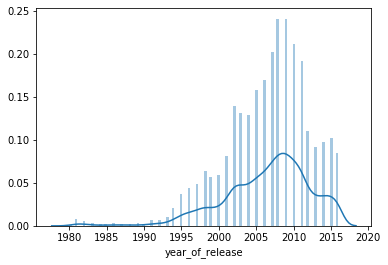

In [21]:
sns.distplot(df['year_of_release'], bins = 100,)
plt.show()

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

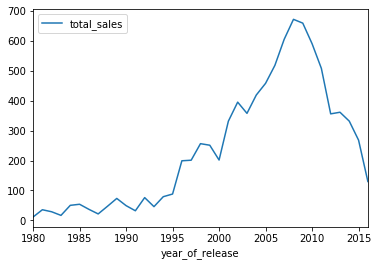

In [23]:
df.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot()
plt.show()

С 1990 по 2009 виден рост выпуска игр, начина с 2009 года сильный спад

Соответсвенно такие же наблюдение и по продажам, чтобы прогнозировать продажи на 2017 год, нам нельзя брать пиковый период для исследования 

In [24]:
top_platforms = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by ='total_sales',ascending = False)

In [25]:
top_platforms = top_platforms.head(6)

In [26]:
top_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


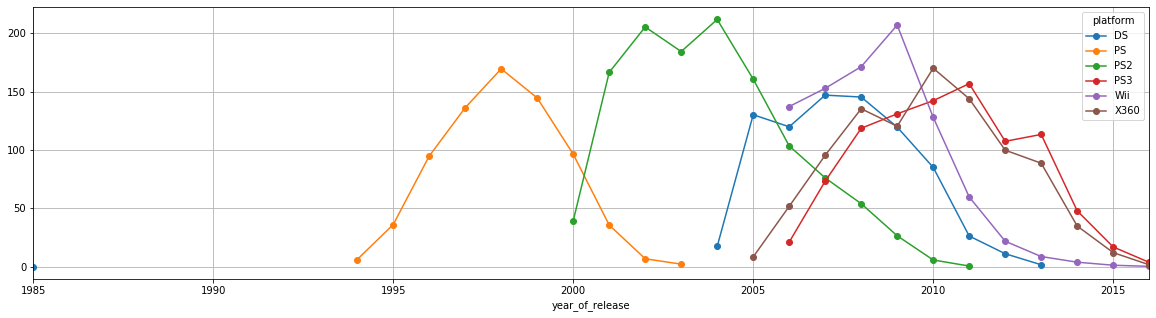

In [27]:
games_top_platforms = df.query('(platform in @top_platforms.index)').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(style='o-', grid=True, figsize=(20, 5))

Срок актуальности платформы примерно 10 лет, пик приходится на 5 году, после 5 лет наблюдается спад продаж. 


Исходя из полученых выводов определим актуальный период, не берем пиковый период и ориентируемся на срок актуальности платформы. Обозначим исследуемый период с 2010 по 2016

In [28]:
new_df = df.query('2010 <= year_of_release <= 2016')

In [29]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


In [30]:
top_platforms_new = new_df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by ='total_sales',ascending = False).head(10)

In [31]:
top_platforms_new

,total_sales
platform,
PS3,587.74
X360,550.41
PS4,314.14
3DS,257.81
Wii,222.97
XOne,159.32
DS,123.75
PC,121.96
WiiU,82.19


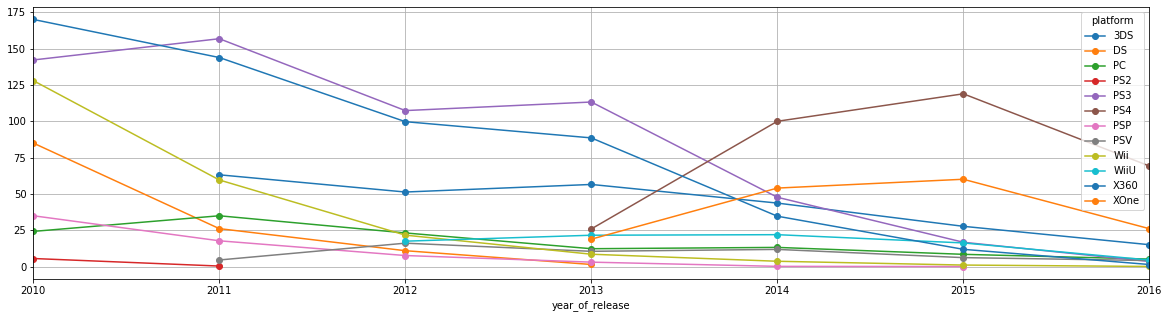

In [32]:
top_platforms = new_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
    .plot(style='o-', grid=True, figsize=(20, 5))

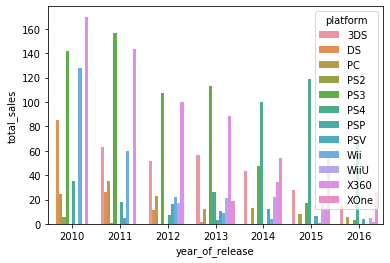

In [33]:
ax = new_df.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()
sns.barplot(data=ax, x='year_of_release', y='total_sales', hue="platform", orient='v')
sns.set(rc={'figure.figsize':(20,12)})

На графиках видно, что преспективные результаты у X360,PS3,WiiU, XOne, 3DS. C 2014 года лидируют PS4 и XOne

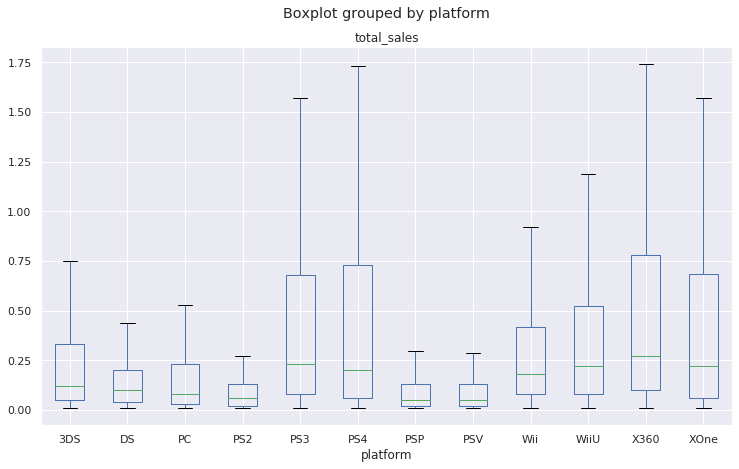

In [34]:
new_df.boxplot('total_sales', by='platform', showfliers=False, figsize=(12,7))
plt.show()


In [35]:
new_df.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,512.0,0.503535,1.441271,0.01,0.05,0.12,0.3325,14.60
DS,507.0,0.244083,0.815643,0.01,0.04,0.10,0.2000,15.13
PC,479.0,0.254614,0.530874,0.01,0.03,0.08,0.2300,5.14
PS2,45.0,0.135333,0.180638,0.01,0.02,0.06,0.1300,0.76
PS3,889.0,0.661125,1.459651,0.01,0.08,0.23,0.6800,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
PSP,500.0,0.128100,0.288250,0.01,0.02,0.05,0.1325,4.87
PSV,429.0,0.125431,0.212341,0.01,0.02,0.05,0.1300,1.96
Wii,450.0,0.495489,1.118375,0.01,0.08,0.18,0.4200,10.12


У крупных платформ, таких как  X360, PS4,PC, 3DS есть расхождения между средним и медианной это свидетельствует о разбросе суммы сборов, что характерно для хитов-продаж 

In [36]:
games_PS3  = new_df.query('platform == "PS3"')[['critic_score','user_score','total_sales']]

In [37]:
games_PS3.head()

,critic_score,user_score,total_sales
16,97.0,8.2,21.05
34,83.0,5.3,13.79
37,88.0,3.2,13.33
41,88.0,6.4,12.63
54,84.0,7.5,10.70


In [38]:
games_PS3.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.595259,0.400594
user_score,0.595259,1.000000,0.065092
total_sales,0.400594,0.065092,1.000000


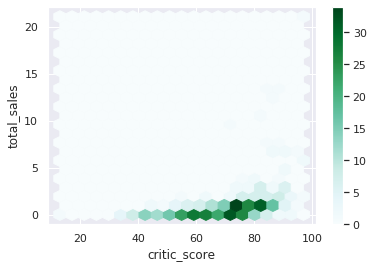

In [39]:
games_PS3.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=20, figsize=(6, 4), sharex=False, grid=True)
plt.show()

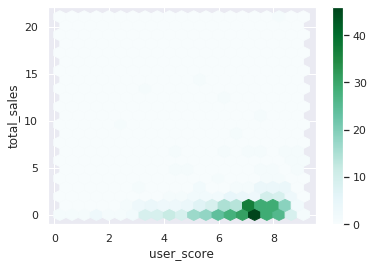

In [40]:
games_PS3.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=20, figsize=(6, 4), sharex=False, grid=True)
plt.show()

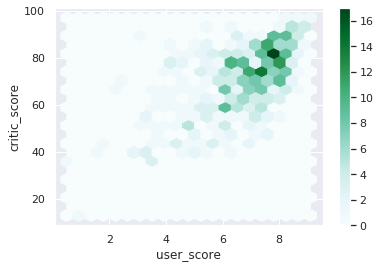

In [41]:
games_PS3.plot(x='user_score', y='critic_score', kind='hexbin', gridsize=20, figsize=(6, 4), sharex=False, grid=True)
plt.show()

Между рейтингом платформы PS3 критиков и продажами сущетсвует линейная зависимость. Корреляция между отзывами пользователей и продажами значитльно ниже

In [42]:
new_df.groupby('platform')[['critic_score','user_score','total_sales']].corr()

critic_score  user_score  total_sales
platform                                                    
3DS      critic_score      1.000000    0.745222     0.348740
         user_score        0.745222    1.000000     0.222078
         total_sales       0.348740    0.222078     1.000000
DS       critic_score      1.000000    0.620256     0.280162
         user_score        0.620256    1.000000     0.251428
         total_sales       0.280162    0.251428     1.000000
PC       critic_score      1.000000    0.478158     0.336497
         user_score        0.478158    1.000000    -0.011087
         total_sales       0.336497   -0.011087     1.000000
PS2      critic_score           NaN         NaN          NaN
         user_score             NaN    1.000000     0.074724
         total_sales            NaN    0.074724     1.000000
PS3      critic_score      1.000000    0.595259     0.400594
         user_score        0.595259    1.000000     0.065092
         total_sales       0.400594    0.065092     1.000000
PS4      critic_score      1.000000    0.557654     0.406568
         user_score        0.557654    1.000000    -0.031957
         total_sales       0.406568   -0.031957     1.000000
PSP      critic_score      1.000000    0.521908     0.403225
         user_score        0.521908    1.000000     0.190636
         total_sales       0.403225    0.190636     1.000000
PSV      critic_score      1.000000    0.734300     0.131763
         user_score        0.734300    1.000000     0.013489
         total_sales       0.131763    0.013489     1.000000
Wii      critic_score      1.000000    0.471698     0.310588
         user_score        0.471698    1.000000     0.147160
         total_sales       0.310588    0.147160     1.000000
WiiU     critic_score      1.000000    0.770080     0.348380
         user_score        0.770080    1.000000     0.400219
         total_sales       0.348380    0.400219     1.000000
X360     critic_score      1.000000    0.597552     0.340064
         user_score        0.597552    1.000000     0.066035
         total_sales       0.340064    0.066035     1.000000
XOne     critic_score      1.000000    0.472462     0.416998
         user_score        0.472462    1.000000    -0.068925
         total_sales       0.416998   -0.068925     1.000000

По всем остальным платформам мы наблюдаем такую же ситуацию как и по PS3 

In [43]:
top_genre = new_df.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(by ='total_sales',ascending = False)

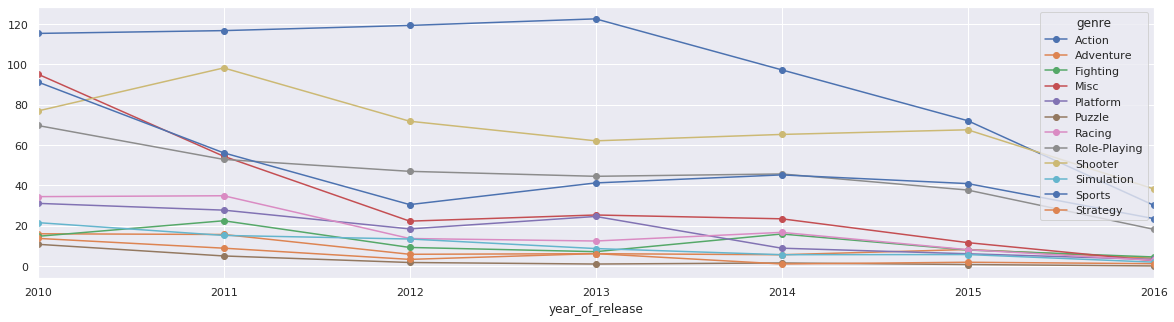

In [44]:
sales_genre = new_df.pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum')\
    .plot(style='o-', grid=True, figsize=(20, 5))

In [45]:
top_genre

,total_sales
genre,
Action,673.09
Shooter,479.74
Sports,328.39
Role-Playing,315.28
Misc,234.56
Racing,122.68
Platform,119.72
Fighting,81.59
Simulation,71.75



Самые продаваемые жанры: Action, Shooter, Sports, Role-Playing, Misc. 
Puzzle	и Strategy не пользуются большим спросом.


## Портрет пользователя каждого региона<a name="part_3"></a>

###  Портрет пользователя региона Северная Америка:<a name="part_4"></a>

In [46]:
# Самые популярные платформы (топ-5)

new_df.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by ='na_sales',ascending = False).head()

,na_sales
platform,
X360,334.18
PS3,229.25
Wii,121.20
PS4,108.74
XOne,93.12


In [47]:
# Самые популярные жанры (топ-5)

new_df.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by ='na_sales',ascending = False).head()

,na_sales
genre,
Action,290.64
Shooter,237.47
Sports,156.81
Misc,123.80
Role-Playing,112.05


In [48]:
# Влияние рейтинга ESRB на продажи в регионе

new_df.pivot_table(index='rating',  values = 'na_sales', aggfunc = 'sum').sort_values(by ='na_sales',ascending = False)

,na_sales
rating,
M,382.22
E,271.15
T,160.81
E10+,159.38
EC,1.13
RP,0.00


Популярной площадкой для пользователя Северной Америки является Xbox360
Лидирующие жанры: Action, Shooter, Sports. Большинство игр с рейтингом "M" с возрастным ограничением 17+


### Портрет пользователя региона Европа:<a name="part_5"></a>

In [49]:
# Самые популярные платформы (топ-5)

new_df.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by ='eu_sales',ascending = False).head()

,eu_sales
platform,
PS3,213.60
X360,163.41
PS4,141.09
PC,68.82
Wii,65.91


In [50]:
# Самые популярные жанры (топ-5)

new_df.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by ='eu_sales',ascending = False).head()

,eu_sales
genre,
Action,233.63
Shooter,171.45
Sports,116.84
Role-Playing,75.48
Misc,66.09


In [51]:
# Влияние рейтинга ESRB на продажи в регионе

new_df.pivot_table(index='rating',  values = 'eu_sales', aggfunc = 'sum').sort_values(by ='eu_sales',ascending = False)

,eu_sales
rating,
M,292.04
E,197.34
T,113.08
E10+,99.28
RP,0.03
EC,0.00


Популярной площадкой для пользователя Европы является PS3
Лидирующие жанры: Action, Shooter, Sports. Большинство игр с рейтингом "M" с возрастным ограничением 17+

### Портрет пользователя региона Япония:<a name="part_6"></a>

In [52]:
# Самые популярные платформы (топ-5)

new_df.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by ='jp_sales',ascending = False).head()

,jp_sales
platform,
3DS,100.62
PS3,59.26
PSP,42.20
DS,27.90
PSV,21.84


In [53]:
# Самые популярные жанры (топ-5)

new_df.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by ='jp_sales',ascending = False).head()

,jp_sales
genre,
Role-Playing,103.54
Action,72.20
Misc,24.29
Platform,15.81
Adventure,15.67


In [54]:
# Влияние рейтинга ESRB на продажи в регионе

new_df.pivot_table(index='rating',  values = 'jp_sales', aggfunc = 'sum').sort_values(by ='jp_sales',ascending = False)

,jp_sales
rating,
E,47.87
T,42.11
M,30.45
E10+,13.22
EC,0.00
RP,0.00


Лидирующие жанры: Role-Playing, Action, Misc. Большинство игр с рейтингом "E" и "T" без возвратных ограничений и с рейтингом T. Можно полагать, что аудитория молодая по сравнению с Европой и Америкой

## Проверка гипотез:<a name="part_7"></a>

Начнем с формулировки нулевой гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза для этой H-0 звучит как cредние пользовательские рейтинги платформ Xbox One и PC отличаются

In [55]:
users_XOne = new_df.query('(platform == "XOne") and (user_score.isna() == False)')['user_score']

users_PC = new_df.query('(platform == "PC") and (user_score.isna() == False)')['user_score']

np.var(users_XOne, ddof=1)

np.var(users_PC, ddof=1)



alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    users_XOne, 
    users_PC,equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.980998110649032
Не получилось отвергнуть нулевую гипотезу


Начнем с формулировки нулевой гипотезы: средние пользовательские рейтинги жанров Action  и Sports равны

Альтернативная гипотеза для этой H-0 звучит как средние пользовательские рейтинги жанров Action  и Sports отличаются

In [56]:
users_action = new_df.query('(genre == "Action") and (user_score.isna() == False)')['user_score']


users_sports = new_df.query('(genre == "Sports") and (user_score.isna() == False)')['user_score']

np.var(users_action, ddof=1)

np.var(users_sports, ddof=1)


alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    users_action, 
    users_sports,equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.839124224330309e-19
Отвергаем нулевую гипотезу


## Вывод:<a name="part_8"></a>

После проведения исследовательский анализ был определен период планирования продаж игр с 2010 по 2016 год 
В 2017 году следует делать ставку на продажи для платформ: PS4, XOne, X360,PS3,WiiU, 3DS.
Основными продаваемыми жанрами будут: Action, Shooter, Sports , Role-playing, Misc
Для каждого из регионов составлен потрет пользователя.
Популярной площадкой для пользователя Северной Америки является Xbox360
Лидирующие жанры: Action, Shooter, Sports. Большинство игр с рейтингом "M" с возрастным ограничением 17+
Популярной площадкой для пользователя Европы является PS3
Лидирующие жанры: Action, Shooter, Sports. Большинство игр с рейтингом "M" с возрастным ограничением 17+
Популярной площадкой для пользователя Японии является 3DS
Лидирующие жанры: Role-Playing, Action, Misc. Большинство игр с рейтингом "E" и "T" без возвратных ограничений и с рейтингом T. Можно полагать, что аудитория молодая по сравнению с Европой и Америкой
Также в ходе исследования были проверены 2 гипотезы:
1.	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2.	средние пользовательские рейтинги жанров Action и Sports отличаются
